In [40]:
from google.colab import files
uploaded = files.upload()

Saving Lab Session Data.xlsx to Lab Session Data (2).xlsx


In [41]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

def load_data(file_path, sheet_name):
  df = pd.read_excel(file_path, sheet_name=sheet_name)
  actual = df["Price"]
  predicted = df["Open"]
  return actual, predicted

def calculate_metrics(actual, predicted):
  mse = mean_squared_error(actual, predicted)
  rmse = np.sqrt(mse)
  mape = np.mean(np.abs((actual - predicted) / actual)) * 100
  r2score = r2_score(actual, predicted)
  print(f"Mean Squared Error (MSE): {mse:.2f}")
  print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
  print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
  print(f"R²-Score: {r2score:.2f}")

actual, predicted = load_data("Lab Session Data.xlsx","IRCTC Stock Price")
calculate_metrics(actual, predicted)

Mean Squared Error (MSE): 1216.59
Root Mean Squared Error (RMSE): 34.88
Mean Absolute Percentage Error (MAPE): 1.39%
R²-Score: 0.98


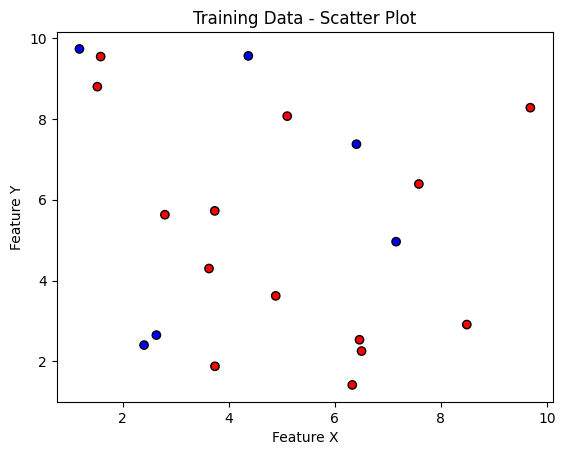

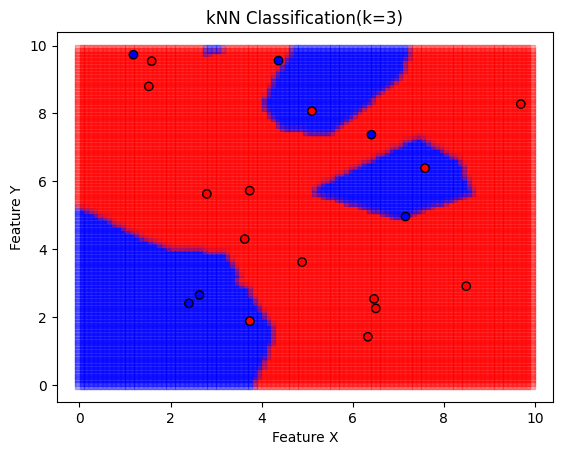

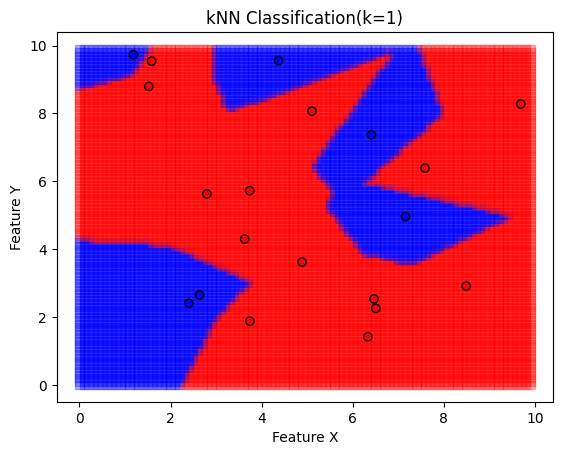

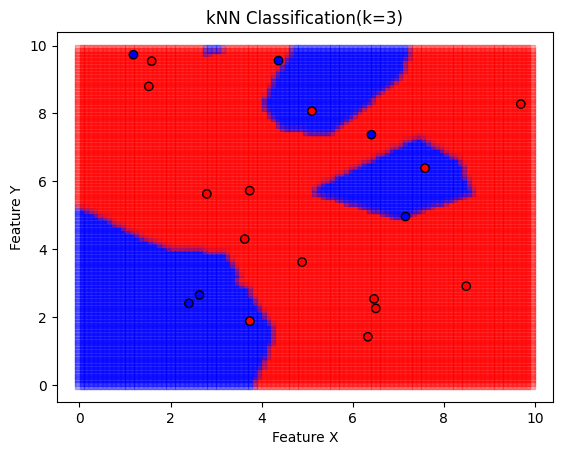

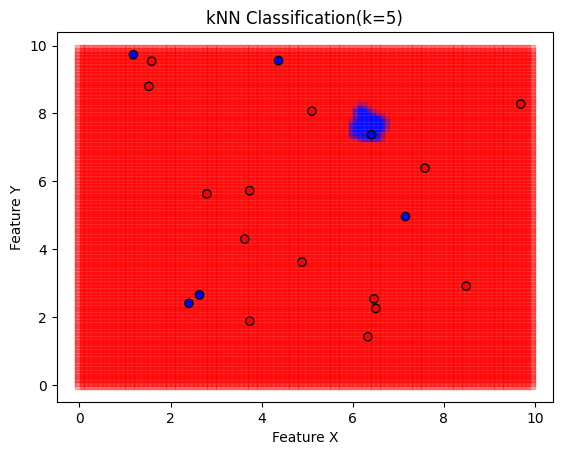

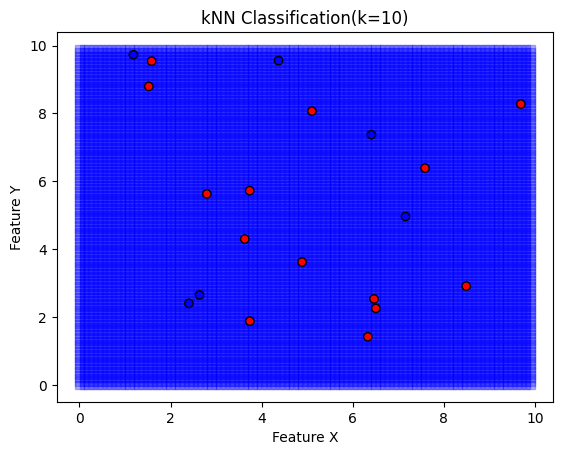

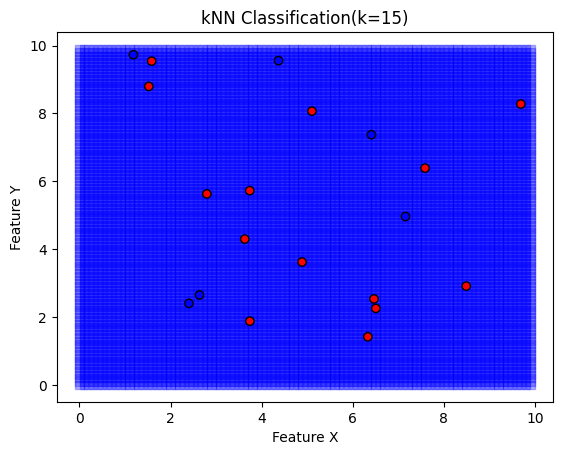

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def generate_training_data(num_points=20, x_range=(1, 10), y_range=(1, 10), seed=42):
  np.random.seed(seed)
  X_train = np.random.uniform([x_range[0], y_range[0]], [x_range[1], y_range[1]], (num_points, 2))
  y_train = np.random.randint(0, 2, num_points)
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr',marker='o',edgecolors='k')
  plt.xlabel("Feature X")
  plt.ylabel("Feature Y")
  plt.title("Training Data - Scatter Plot")
  plt.show()
  return X_train, y_train

def generate_test_data(step=0.1, x_range=(0, 10), y_range=(0, 10)):
    x_test = np.arange(x_range[0], x_range[1], step)
    y_test = np.arange(y_range[0], y_range[1], step)
    X_test, Y_test = np.meshgrid(x_test, y_test)
    test_points = np.column_stack((X_test.ravel(), Y_test.ravel()))
    return test_points

def classify_knn(X_train, y_train, X_test, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_test = knn.predict(X_test)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test, cmap='bwr', alpha=0.3, marker='s')
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolors='k', marker='o')
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.title(f"kNN Classification(k={k})")
    plt.show()

def evaluate_knn_for_different_k(X_train, y_train, X_test, k_values):
    for k in k_values:
        classify_knn(X_train, y_train, X_test, k)


X_train, y_train = generate_training_data()
X_test = generate_test_data()
classify_knn(X_train, y_train, X_test, 3)
evaluate_knn_for_different_k(X_train, y_train, X_test,[1, 3, 5, 10, 15])

In [43]:
from google.colab import files
uploaded = files.upload()

Saving Judgment_Embeddings_InLegalBERT.xlsx to Judgment_Embeddings_InLegalBERT (2).xlsx



Confusion Matrix (Train Data):
 [[1027   62]
 [  64  429]]
Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1089
           1       0.87      0.87      0.87       493

    accuracy                           0.92      1582
   macro avg       0.91      0.91      0.91      1582
weighted avg       0.92      0.92      0.92      1582


Confusion Matrix (Test Data):
 [[250  27]
 [ 24  95]]
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       277
           1       0.78      0.80      0.79       119

    accuracy                           0.87       396
   macro avg       0.85      0.85      0.85       396
weighted avg       0.87      0.87      0.87       396


Training Accuracy: 0.9204
Test Accuracy: 0.8712


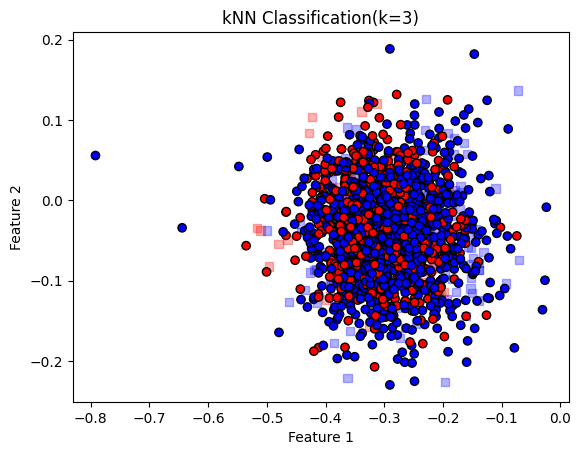

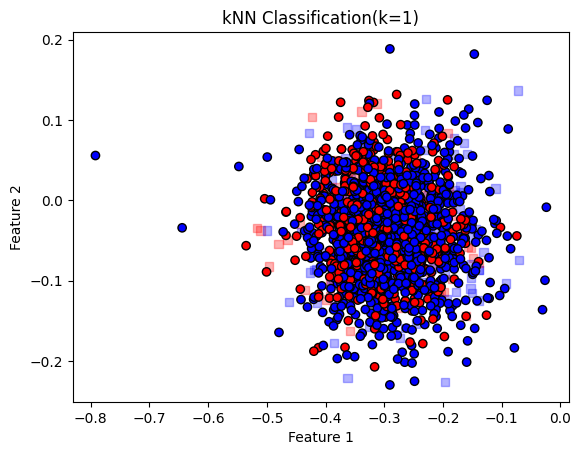

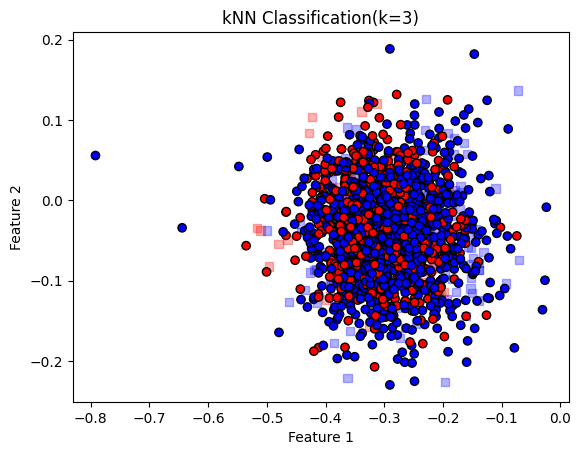

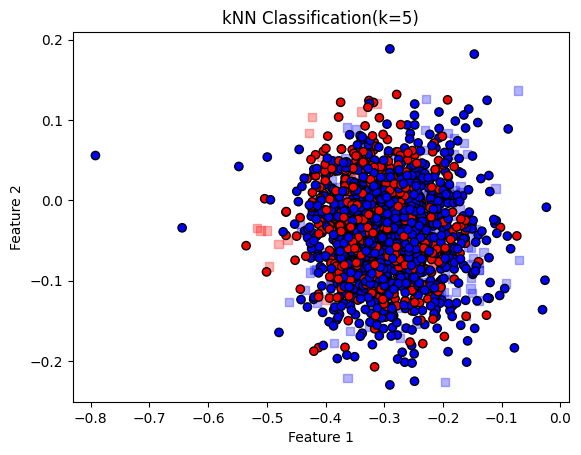

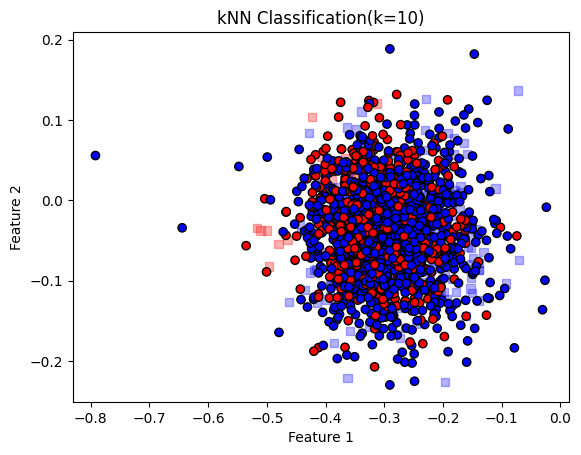

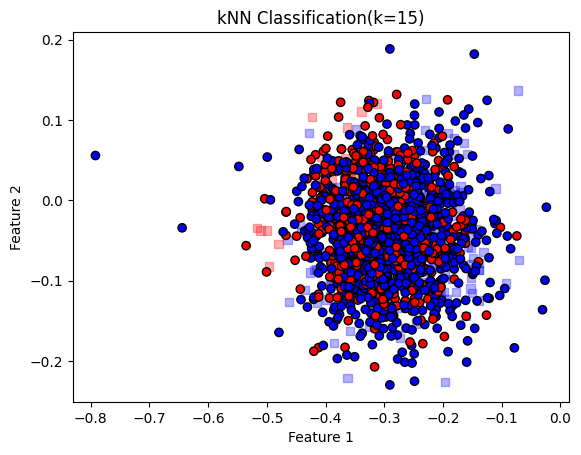

Best k value found: 19


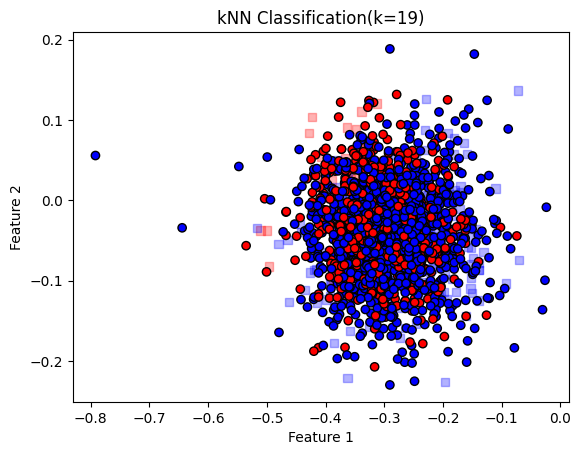

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def load_data(file_path):
    df = pd.read_excel(file_path)
    df = df[df["Label"].isin([0, 1])]
    X = df.drop(columns=["Label"]).values
    y = df["Label"].values
    return X, y

def evaluate_knn_classification(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    y_train_pred, y_test_pred = knn.predict(X_train), knn.predict(X_test)

    print("\nConfusion Matrix (Train Data):\n", confusion_matrix(y_train, y_train_pred))
    print("Classification Report (Train Data):\n", classification_report(y_train, y_train_pred))

    print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_pred))
    print("Classification Report (Test Data):\n", classification_report(y_test, y_test_pred))

    print(f"\nTraining Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

def plot_knn_classification(X_train, y_train, X_test, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_test = knn.predict(X_test)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test, cmap='bwr', alpha=0.3, marker='s')
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolors='k', marker='o')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"kNN Classification(k={k})")
    plt.show()

def evaluate_knn_for_different_k(X_train, y_train, X_test, k_values):
    for k in k_values:
        plot_knn_classification(X_train, y_train, X_test, k)

def hyperparameter_tuning_knn(X_train, y_train):
    param_grid = {'n_neighbors': np.arange(1, 20, 2)}
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_k = grid_search.best_params_['n_neighbors']
    print(f"Best k value found: {best_k}")
    return best_k

X, y = load_data("Judgment_Embeddings_InLegalBERT.xlsx")
evaluate_knn_classification(X, y)
selected_features = [0, 1]
X_selected = X[:, selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2)
plot_knn_classification(X_train, y_train, X_test,3)
evaluate_knn_for_different_k(X_train, y_train, X_test,[1, 3, 5, 10, 15])
best_k = hyperparameter_tuning_knn(X_train, y_train)
plot_knn_classification(X_train, y_train, X_test, best_k)